In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import glob
import numpy as np
%matplotlib inline

** Define the path to train and test data sets**

In [2]:
train_path = '../input/train/'
test_path = '../input/test_stg1/'
folders = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'SHARK', 'YFT', 'OTHER']

** Check the figure sizes **

In [12]:
def load_figure_shapes(path):
    figs = glob.glob(path + '/' + '*.jpg')
    fig_cv2 = [cv2.imread(fig) for fig in figs]
    fig_shapes = pd.Series([fig.shape for fig in fig_cv2])
    
    return fig_shapes
    
for folder in folders:
    path = train_path + folder
    fig_shapes = load_figure_shapes(path)
    print ('Fish figures in folder ' + folder + ' have distribution of shapes:' )
    print (fig_shapes.value_counts())

Fish figures in folder ALB have distribution of shapes:
(720, 1280, 3)    1060
(750, 1280, 3)     303
(670, 1192, 3)     164
(718, 1276, 3)     109
(974, 1280, 3)      41
(924, 1280, 3)      34
(854, 1518, 3)       6
(700, 1244, 3)       2
dtype: int64
Fish figures in folder BET have distribution of shapes:
(720, 1280, 3)    90
(974, 1280, 3)    71
(854, 1518, 3)    17
(670, 1192, 3)     9
(750, 1280, 3)     7
(700, 1244, 3)     5
(718, 1276, 3)     1
dtype: int64
Fish figures in folder DOL have distribution of shapes:
(720, 1280, 3)    54
(974, 1280, 3)    39
(750, 1280, 3)    24
dtype: int64
Fish figures in folder LAG have distribution of shapes:
(720, 1280, 3)    67
dtype: int64
Fish figures in folder NoF have distribution of shapes:
(720, 1280, 3)    190
(718, 1276, 3)     95
(750, 1280, 3)     64
(974, 1732, 3)     35
(750, 1334, 3)     31
(670, 1192, 3)     23
(854, 1518, 3)     14
(700, 1244, 3)     13
dtype: int64
Fish figures in folder SHARK have distribution of shapes:
(720, 

** An example of image denoising using opencv cv2.fastNlMeansDenoisingColored() **  
** If you carefully compare the orginal and denoised images, there are some difference **  
** No sure if it is usefull for pre-processing the imgae **

59.478463888168335


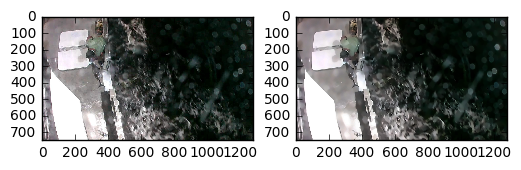

In [4]:
img1 = cv2.imread(train_path+'ALB/'+'img_00037.jpg')
import time
start_time = time.time()
dst1 = cv2.fastNlMeansDenoisingColored(img1,None,10,10,7,21)
stop_time = time.time()
print (stop_time-start_time)
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(dst1)
plt.show()

** Define plot the histograms of the figures function **

In [19]:
def plot_figure_histograms(path, column=4):
    """
        Plot the historgrams of figures in each folder
        col: Number of figures in each row during plotting
    """
    figs = glob.glob(path + '/' + '*.jpg')
    fig_cv2 = [cv2.imread(fig) for fig in figs]
    #Determine the rows for subplot
    row = len(fig_cv2)//column + (len(fig_cv2)%column>0)
    
    count = 1
    for img in fig_cv2:
        color = ('b', 'g', 'r') # Blue, Green and Red
        for i, col in enumerate(color):
            hist = cv2.calcHist([img], [i], None, [256], [0,256])
            plt.subplot(row, column, count)
            plt.plot(hist, color=col)
            plt.xlim([0,256])
        count += 1
    plt.show()


** Plot the histogram of three examples figures **

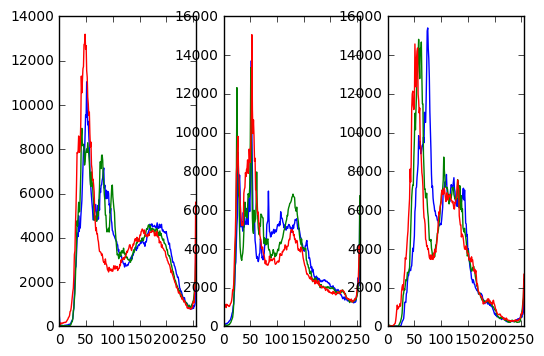

In [22]:
img1 = cv2.imread(train_path+'NoF/'+'img_00178.jpg')
img2 = cv2.imread(train_path+'NoF/'+'img_00143.jpg')
img3 = cv2.imread(train_path+'NoF/'+'img_00011.jpg')
color = ('b', 'g', 'r') # Blue, Green and Red
count = 1
for img in [img1,img2,img3]:
    for i, col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0,256])
        plt.subplot(1, 3, count)
        plt.plot(hist, color=col)
        plt.xlim([0,256])
    count += 1
plt.show()

** Check figure similarity by comparing the historgram of each figures**

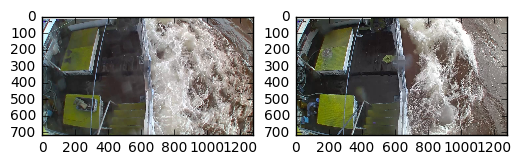

Score between img_00178.jpg and img_00143.jpg using correlation method


0.29411389364640883

In [17]:
img1 = cv2.imread(train_path+'NoF/'+'img_00178.jpg')
img2 = cv2.imread(train_path+'NoF/'+'img_00143.jpg')
#img2 = cv2.imread(train_path+'NoF/'+'img_00178.jpg')
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.show()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
hist1 = cv2.calcHist([img1], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])
dst1 = np.zeros(shape=(256,256,256))
cv2.normalize(hist1,dst1)
hist1 = hist1.flatten()
hist2 = cv2.calcHist([img2], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])
dst2 = np.zeros(shape=(256,256,256))
cv2.normalize(hist2,dst2)
hist2 = hist2.flatten()
print ('Score between img_00178.jpg and img_00143.jpg using correlation method')
cv2.compareHist(hist1, hist2, 0)

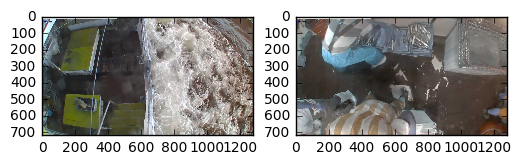

Score between img_00178.jpg and img_00011.jpg using correlation method


0.1378557906171793

In [18]:
img1 = cv2.imread(train_path+'NoF/'+'img_00178.jpg')
img2 = cv2.imread(train_path+'NoF/'+'img_00011.jpg')
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.show()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
hist1 = cv2.calcHist([img1], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])
dst1 = np.zeros(shape=(256,256,256))
cv2.normalize(hist1,dst1)
hist1 = hist1.flatten()
hist2 = cv2.calcHist([img2], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])
dst2 = np.zeros(shape=(256,256,256))
cv2.normalize(hist2,dst2)
hist2 = hist2.flatten()
print ('Score between img_00178.jpg and img_00011.jpg using correlation method')
cv2.compareHist(hist1, hist2, 0)